Este documento detalha os resultados obtidos através da aplicação do algoritmo `SAC_DM` sobre sinais de geradores de energia eólica. Em um primeiro momento, foi aplicado o SAC_DM sobre o sinal `original`. Já no segundo momento, uma etapa extra foi executada, o sinal foi passado por um filtro `wavelet` antes de ser aplicado ao SAC_DM.

In [1]:
import pywt
import numpy as np
from scipy import signal
from scipy.interpolate import interp1d
from scipy.signal import butter, filtfilt, iirdesign, zpk2tf, freqz

import sys

from scipy.interpolate import spline

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [2]:
def upload_signal(filename):
    data = np.genfromtxt(filename, delimiter=' ', names=['x', 'y'])
    return data

In [3]:
def sac_dm(data, GROUP_SIZE):

	threshold = 0.0

	DATASET_SIZE = len(data['y'])

	rho = 0.0

	GROUP_AMOUNT = 1 + int(DATASET_SIZE)/GROUP_SIZE
	sacdm=[0.0] * int(GROUP_AMOUNT)


	up = 0
	peaks = 0
	i = 0
	n = GROUP_SIZE
	j = 0
	while i < DATASET_SIZE-2:
		a = data['y'][i]
		b = data['y'][i+1]
		c = data['y'][i+2]

		if b > (a+threshold) and b > (c+threshold):
			peaks = peaks + 1
			
		if i == n:
			rho = peaks/float(GROUP_SIZE)

			if rho != 0:
				# sacdm[j] = rho 
				sacdm[j]=1/(6*rho)
			else:
				sacdm[j] = 0
			j = j + 1
			n = n + GROUP_SIZE
			peaks = 0
		i = i+1

	avg = sum(sacdm)/len(sacdm)
	print("Average: ", avg)
	return sacdm, avg


# Tipos de Defeitos

Defeito 1 (**D1**) – curto-circuito entre espiras

Defeito 2 (**D2**) – curto-circuito espira-terra (espira-carcaça)

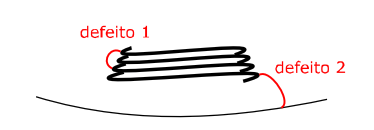

In [4]:
from IPython.display import Image, display

#Read image
display(Image(filename = "defeitos.png"))


# Upload dos sinais

In [5]:
data_on = upload_signal("dados/C100_F5k_ON.txt") #Sem defeito

data_d1_p1_r1 = upload_signal("dados/C100_F5k_D1_P1_R1.txt")
data_d2_p1_r1 = upload_signal("dados/C100_F5k_D2_P1_R1.txt")

data_d1_p1_r2 = upload_signal("dados/C100_F5k_D1_P1_R2.txt")
data_d2_p1_r2 = upload_signal("dados/C100_F5k_D2_P1_R2.txt")

data_d1_p2_r1 = upload_signal("dados/C100_F5k_D1_P2_R1.txt")
data_d2_p2_r1 = upload_signal("dados/C100_F5k_D2_P2_R1.txt")

data_d1_p2_r2 = upload_signal("dados/C100_F5k_D1_P2_R2.txt")
data_d2_p2_r2 = upload_signal("dados/C100_F5k_D2_P2_R2.txt")

data_d1_p5_r1 = upload_signal("dados/C100_F5k_D1_P5_R1.txt")
data_d2_p5_r1 = upload_signal("dados/C100_F5k_D2_P5_R1.txt")

data_d1_p5_r2 = upload_signal("dados/C100_F5k_D1_P5_R2.txt")
data_d2_p5_r2 = upload_signal("dados/C100_F5k_D2_P5_R2.txt")

data_d1_p10_r1 = upload_signal("dados/C100_F5k_D1_P10_R1.txt")
data_d2_p10_r1 = upload_signal("dados/C100_F5k_D2_P10_R1.txt")

data_d1_p10_r2 = upload_signal("dados/C100_F5k_D1_P10_R2.txt")
data_d2_p10_r2 = upload_signal("dados/C100_F5k_D2_P10_R2.txt")


# Aplicação do SAC_DM

In [6]:
GROUP_SIZE = 1000
avg_amount = []

#ON
sac_on, avg = sac_dm(data_on, GROUP_SIZE)
avg_amount.append(avg)

#D1_P1_R1
sac_d1_p1_r1, avg = sac_dm(data_d1_p1_r1, GROUP_SIZE)
avg_amount.append(avg)
avg_d1 = avg
#D2_P1_R1
sac_d2_p1_r1, avg = sac_dm(data_d2_p1_r1, GROUP_SIZE)
avg_amount.append(avg)
avg_d2 = avg

#D1_P1_R2
sac_d1_p1_r2, avg = sac_dm(data_d1_p1_r2, GROUP_SIZE)
avg_amount.append(avg)
#D2_P1_R2
sac_d2_p1_r2, avg = sac_dm(data_d2_p1_r2, GROUP_SIZE)
avg_amount.append(avg)

#D1_P2_R1
sac_d1_p2_r1, avg = sac_dm(data_d1_p2_r1, GROUP_SIZE)
avg_amount.append(avg)
#D2_P2_R1
sac_d2_p2_r1, avg = sac_dm(data_d2_p2_r1, GROUP_SIZE)
avg_amount.append(avg)

#D1_P2_R2
sac_d1_p2_r2, avg = sac_dm(data_d1_p2_r2, GROUP_SIZE)
avg_amount.append(avg)
#D2_P2_R2
sac_d2_p2_r2, avg = sac_dm(data_d2_p2_r2, GROUP_SIZE)
avg_amount.append(avg)

#D1_P5_R1
sac_d1_p5_r1, avg = sac_dm(data_d1_p5_r1, GROUP_SIZE)
avg_amount.append(avg)
#D2_P5_R1
sac_d2_p5_r1, avg = sac_dm(data_d2_p5_r1, GROUP_SIZE)
avg_amount.append(avg)

#D1_P5_R2
sac_d1_p5_r2, avg = sac_dm(data_d1_p5_r2, GROUP_SIZE)
avg_amount.append(avg)
#D2_P5_R2
sac_d2_p5_r2, avg = sac_dm(data_d2_p5_r2, GROUP_SIZE)
avg_amount.append(avg)

#D1_P10_R1
sac_d1_p10_r1, avg = sac_dm(data_d1_p10_r1, GROUP_SIZE)
avg_amount.append(avg)
#D2_P10_R1
sac_d2_p10_r1, avg = sac_dm(data_d2_p10_r1, GROUP_SIZE)
avg_amount.append(avg)

#D1_P10_R2
sac_d1_p10_r2, avg = sac_dm(data_d1_p10_r2, GROUP_SIZE)
avg_amount.append(avg)
#D2_P10_R2
sac_d2_p10_r2, avg = sac_dm(data_d2_p10_r2, GROUP_SIZE)
avg_amount.append(avg)

Average:  3.312019190216666
Average:  2.3908130754246577
Average:  2.391521272682767
Average:  2.306940051551028
Average:  2.305666994937811
Average:  2.574377833283372
Average:  2.5737629971624614
Average:  2.567255420696438
Average:  2.568295658535298
Average:  3.225592702208969
Average:  3.221377768427262
Average:  3.016506342662343
Average:  3.018646991701689
Average:  4.902033688521713
Average:  4.904930997102874
Average:  3.6469624434928956
Average:  3.650004195214115


In [7]:
d1_p1_r1_min = sac_d1_p1_r1[:900]

d2_p1_r1_min = sac_d2_p1_r1[:900]

for i in range(len(d1_p1_r1_min)):
    d1_p1_r1_min[i] = (d1_p1_r1_min[i] - avg_d1) **3
    d2_p1_r1_min[i] = (d2_p1_r1_min[i] - avg_d2) **3

# Médias obtidas

In [8]:
avg_layout = go.Layout(
    title='Averages',
    xaxis=dict(
        title='Samples',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Avg',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)
iplot({
    "data":[go.Scatter(
        x=['ON','D1_P1_R1','D2_P1_R1','D1_P1_R2','D2_P1_R2','D1_P2_R1','D2_P2_R1','D1_P2_R2','D2_P2_R2','D1_P5_R1','D2_P5_R1','D1_P5_R2','D2_P5_R2','D1_P10_R1','D2_P10_R1','D1_P10_R2','D2_P10_R2'],
        y=avg_amount)],
    "layout":avg_layout
})

# Plotando todos os sinais após o SAC_DM

In [9]:
#The 'C100_F5k_' prefix has been removed for easy reading

g_on = go.Scatter(name="ON", y=sac_on)

g_d1_p1_r1 = go.Scatter(name="D1_P1_R1", y=sac_d1_p1_r1)
g_d2_p1_r1 = go.Scatter(name="D2_P1_R1", y=sac_d2_p1_r1)

g_d1_p1_r2 = go.Scatter(name="D1_P1_R2", y=sac_d1_p1_r2)
g_d2_p1_r2 = go.Scatter(name="D2_P1_R2", y=sac_d2_p1_r2)

g_d1_p2_r1 = go.Scatter(name="D1_P2_R1", y=sac_d1_p2_r1)
g_d2_p2_r1 = go.Scatter(name="D2_P2_R1", y=sac_d2_p2_r1)

g_d1_p2_r2 = go.Scatter(name="D1_P2_R2", y=sac_d1_p2_r2)
g_d2_p2_r2 = go.Scatter(name="D2_P2_R2", y=sac_d2_p2_r2)

g_d1_p5_r1 = go.Scatter(name="D1_P5_R1", y=sac_d1_p5_r1)
g_d2_p5_r1 = go.Scatter(name="D2_P5_R1", y=sac_d2_p5_r1)

g_d1_p5_r2 = go.Scatter(name="D1_P5_R2", y=sac_d1_p5_r2)
g_d2_p5_r2 = go.Scatter(name="D2_P5_R2", y=sac_d2_p5_r2)

g_d1_p10_r1 = go.Scatter(name="D1_P10_R1", y=sac_d1_p10_r1)
g_d2_p10_r1 = go.Scatter(name="D2_P10_R1", y=sac_d2_p10_r1)

g_d1_p10_r2 = go.Scatter(name="D1_P10_R2", y=sac_d1_p10_r2)
g_d2_p10_r2 = go.Scatter(name="D2_P10_R2", y=sac_d2_p10_r2)

cor_layout = go.Layout(
    title='Signal',
    xaxis=dict(
        title='Time (ms)',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Correlation Length',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

iplot({
    'data': [g_on, g_d1_p1_r1, g_d2_p1_r1, g_d1_p1_r2, g_d2_p1_r2, g_d1_p2_r1, g_d2_p2_r1, g_d1_p2_r2, g_d2_p2_r2, g_d1_p5_r1, g_d2_p5_r1, g_d1_p5_r2, g_d2_p5_r2, g_d1_p10_r1, g_d2_p10_r1, g_d1_p10_r2, g_d2_p10_r2],
    'layout': cor_layout})

# Isolando 2 amostras:

Comparando os sinais `D1_P1_R1` e `D2_P1_R1` com SAC_DM sem Wavelet

In [10]:
iplot({
    'data': [g_d1_p1_r1, g_d2_p1_r1],
    'layout': cor_layout})

# Distância de Hamming

In [11]:
hamming_0 = []
for i in range(min(len(sac_d1_p1_r1), len(sac_d2_p1_r1))):
    binary = (1 if sac_d1_p1_r1[i] != sac_d2_p1_r1[i] else 0)
    hamming_0.append(binary)

In [12]:
print(sum(hamming_0)/len(hamming_0))

0.4405594405594406


# Aplicação do filtro Wavelet

O filtro `Wavelet` foi aplicado apenas nas amostras `D1_P1_R1` e `D2_P1_R1`

In [13]:
(cA1, cD1) = pywt.dwt(data_d1_p1_r1['y'], 'db9')
(cA2, cD2) = pywt.dwt(data_d2_p1_r1['y'], 'db9')

In [14]:
a_data_d1_p1_r1 = data_d1_p1_r1[:500000]
a_data_d1_p1_r1['y'] = cA1[:500000]

a_data_d2_p1_r1 = data_d2_p1_r1[:500000]
a_data_d2_p1_r1['y'] = cA2[:500000]

sac_a_data_d1_p1_r1, x = sac_dm(a_data_d1_p1_r1, 1000)
sac_a_data_d2_p1_r1, x = sac_dm(a_data_d2_p1_r1, 1000)

ga_d1_p1_r1 = go.Scatter(name="D1_P1_R1", y=sac_a_data_d1_p1_r1)
ga_d2_p1_r1 = go.Scatter(name="D2_P1_R1", y=sac_a_data_d2_p1_r1)

Average:  0.9952746560046184
Average:  0.9953012331402699


# Hamming distance

In [15]:
hamming_1 = []
for i in range(min(len(a_data_d1_p1_r1['y']), len(a_data_d2_p1_r1['y']))):
    binary = (1 if a_data_d1_p1_r1['y'][i] != a_data_d2_p1_r1['y'][i] else 0)
    hamming_1.append(binary)

In [16]:
print("Hamming distance: ", sum(hamming_1)/len(hamming_1))

Hamming distance:  0.999974


# Canberra distance

In [17]:
#Read image
display(Image(url = "https://wikimedia.org/api/rest_v1/media/math/render/svg/295823304fb697aacb60710d2c56b4491c880ffe"))

In [18]:
from numpy import matrix
a1 = a_data_d1_p1_r1['y']
a2 = a_data_d2_p1_r1['y']
print("Canberra distance: ", abs(sum(a1-a2))/(abs(sum(a1))+abs(sum(a2))))


Canberra distance:  0.6318502611074814


Comparando os sinais `D1_P1_R1` e `D2_P1_R1` com SAC_DM após o `Wavelet`

# Coeficientes de aproximação

In [19]:
iplot({
    'data': [ga_d1_p1_r1, ga_d2_p1_r1],
    'layout': cor_layout})

In [20]:
d_data_d1_p1_r1 = data_d1_p1_r1[:500000]
d_data_d1_p1_r1['y'] = cD1[:500000]

d_data_d2_p1_r1 = data_d2_p1_r1[:500000]
d_data_d2_p1_r1['y'] = cD2[:500000]

sac_d_data_d1_p1_r1, x = sac_dm(d_data_d1_p1_r1, 1000)
sac_d_data_d2_p1_r1, x = sac_dm(d_data_d2_p1_r1, 1000)

gd_d1_p1_r1 = go.Scatter(name="D1_P1_R1", y=sac_d_data_d1_p1_r1)
gd_d2_p1_r1 = go.Scatter(name="D2_P1_R1", y=sac_d_data_d2_p1_r1)

Average:  0.4408823277516517
Average:  0.440563881290928


# Coeficientes de detalhe

In [21]:
iplot({
    'data': [gd_d1_p1_r1, gd_d2_p1_r1],
    'layout': cor_layout})

In [22]:
pywt.wavelist('db')

['db1',
 'db2',
 'db3',
 'db4',
 'db5',
 'db6',
 'db7',
 'db8',
 'db9',
 'db10',
 'db11',
 'db12',
 'db13',
 'db14',
 'db15',
 'db16',
 'db17',
 'db18',
 'db19',
 'db20',
 'db21',
 'db22',
 'db23',
 'db24',
 'db25',
 'db26',
 'db27',
 'db28',
 'db29',
 'db30',
 'db31',
 'db32',
 'db33',
 'db34',
 'db35',
 'db36',
 'db37',
 'db38']

In [23]:
gd_d1_p1_r1_min = go.Scatter(name="D1_P1_R1", y=d1_p1_r1_min)
gd_d2_p1_r1_min = go.Scatter(name="D2_P1_R1", y=d2_p1_r1_min)

iplot({
    'data': [gd_d1_p1_r1_min, gd_d2_p1_r1_min],
    'layout': cor_layout})